# Assignment Python 2
Nama : Putu Wahyu Kusuma Wardhana <br>
Program : Python For Data Science <br>
Batch : 5

## 1. Deskripsi Dataset

Dataset ini berisi setiap bangunan yang dijual di New York City selama 1 tahun dan lokasi, alamat, jenis, harga jual, dan tanggal penjualannya.

BOROUGH: Kode digit untuk borough tempat properti tersebut berada.

         - Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)


Catatan : Penjualan 0 dolar sebenarnya adalah transfer kepemilikan antar pihak.

## 2. Data Preparation

### Import Library

In [263]:
import numpy as np
import pandas as pd

### Load Dataset 

In [264]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [265]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [266]:
print ('Dimensions of the dataframe : ')
df.shape

Dimensions of the dataframe : 


(84548, 22)

### Drop Columns
Tahap ini bertujuan untuk melakukan drop atau menghapus kolom yang tidak diperlukan dalam proses selanjutnya. Pada kasus ini, terdapat dua fitur yaitu "Unnamed: 0" dan "EASE-MENT". Kolom "Unnamed: 0" dihapus karena hanya sebagai no urut sehingga tidak dapat dipakai untuk perhitungan atau analisis. Sedangkan, kolom "EASE-MENT" hanya kolom kosong.

In [267]:
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Info Dataset

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX

In [269]:
# let's check which columns should be categorical
print('Column Name : ')
for i in df.columns:
    if df[i].dtype=='object':
        print(i, df[i].nunique())

Column Name : 
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


## 3. Pre-Processing

### Formatting

In [270]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric.
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

### Check Missing Values

In [271]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [272]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [273]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [274]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

Pada tahap ini tidak perlu dilakukan penghapusan nilai NaN atau drop missing value, karena proses descriptive statistics dengan library Numpy dapat mengabaikan nilai NaN.

### Check Duplicates

In [275]:
print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [276]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


Pada tahap ini dilakukan penghapusan pada duplikat sehingga menjadi 0 baris duplikat, yang mana awalnya dataset ini memiliki 765 baris.

## 4. EDA (Exploratory Data Analysis)

### Descriptive Statistics

#### a. Measure of Central Tendency : Mean

In [277]:
# Question: Calculate the mean for each Borough.

In [278]:
# 1. pre-processing if needed

df1 = df['SALE PRICE'].groupby(df['BOROUGH']).value_counts()

print(df1)

BOROUGH  SALE PRICE 
1        10.0           90
         1100000.0      89
         750000.0       82
         1300000.0      79
         1250000.0      77
                        ..
5        11700000.0      1
         11900000.0      1
         31500000.0      1
         67200000.0      1
         122000000.0     1
Name: SALE PRICE, Length: 14997, dtype: int64


In [279]:
# 2. Implement/try-to-use statistical method here ..

# Use Numpy
mean_ = df1.mean()

print('Mean : ',mean_)

Mean :  4.641394945655798


#### b. Measure of Central Tendency : Median

In [280]:
# Question: Calculate the median for each Borough.

In [281]:
# 1. pre-processing if needed

In [282]:
# 2. Implement/try-to-use statistical method here ..

# Use Numpy
print('Median : ',df1.median())

Median :  1.0


#### c. Measure of Central Tendency : Modus

In [283]:
# Question: Calculate the mode for each Borough.

In [284]:
# 1. pre-processing if needed

In [285]:
# 2. Implement/try-to-use statistical method here ..

df1.mode()

0    1
dtype: int64

#### d. Measure of Spread: Range

In [286]:
# Question: Calculate the Range for each Borough.

In [287]:
# 1. pre-processing if needed

df2= df1.describe()

In [288]:
# 2. Implement/try-to-use statistical method here ..

range = df2['max']-df2['min']

print('Range : ',range)

Range :  8185.0


#### e. Measure of Spread: Variance

In [289]:
# Question: Calculate the Variance for each Borough.

In [290]:
# 1. pre-processing if needed

In [291]:
# 2. Implement/try-to-use statistical method here ..

var = df1.var()

print('Variance : ',var)

Variance :  4799.127995598708


#### f. Measure of Spread: Standard Deviation

In [292]:
# Question: Calculate the SD for each Borough.

In [293]:
# 1. pre-processing if needed

In [294]:
# 2. Implement/try-to-use statistical method here ..

std = df1.std()

print('Standard Deviation : ',std)

Standard Deviation :  69.27573886721605


### Inferential Statistics

#### g. Probability Distribution

In [295]:
# Implement/try-to-use statistical method here ..

# for inline plots in jupyter
%matplotlib inline

# import matplotlib
import matplotlib.pyplot as plt

# for latex equations
from IPython.display import Math, Latex

# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns


# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10,10)})

In [296]:
df4 = df['BOROUGH'].groupby(df['BOROUGH']).value_counts()
df4

BOROUGH  BOROUGH
1        1          18102
2        2           6994
3        3          23843
4        4          26548
5        5           8296
Name: BOROUGH, dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

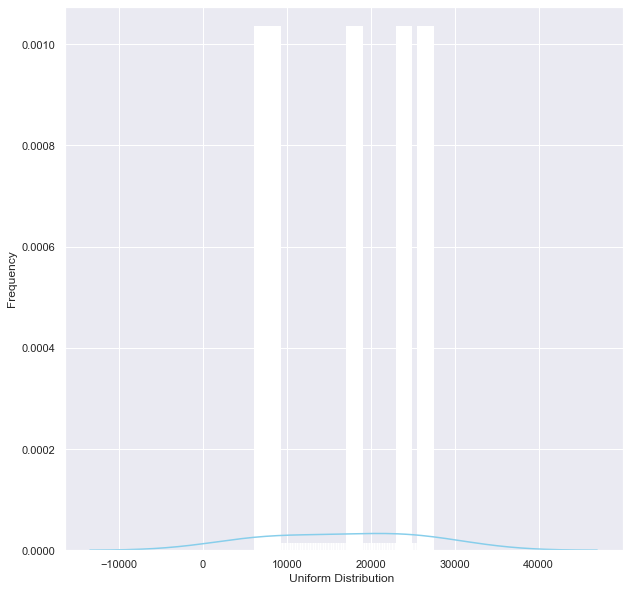

In [297]:
ax = sns.distplot(df4,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

Distribusi data diatas memberikan kita suatu Probability Distribution yang memberikan gambaran persebaran kemungkinan jumlah per "BOROUGH". Kita dapat mengetahui bahwa jika kita mengambil nilai secara acak maka kemungkinan mendapatkan total per "BOROUGH" kurang dari 0 atau lebih dari 30000 adalah kecil.

#### h. Confidence Intervals

In [298]:
dx = df[["SALE PRICE", "BOROUGH"]].dropna()

pd.crosstab(dx['SALE PRICE'], dx['BOROUGH'])

BOROUGH,1,2,3,4,5
SALE PRICE,,,,,
0.000000e+00,0,1826,8186,0,0
1.000000e+00,30,22,37,28,9
2.000000e+00,2,0,0,1,0
3.000000e+00,0,1,0,1,0
5.000000e+00,0,0,1,0,0
...,...,...,...,...,...
5.650000e+08,1,0,0,0,0
6.200000e+08,1,0,0,0,0
6.520000e+08,1,0,0,0,0


In [299]:
# 2. Implement/try-to-use statistical method here ..

p_fm = 1826/(1826+22)
p_fm

0.9880952380952381

In [300]:
n = 1826+22
n

1848

In [301]:
br_2 = np.sqrt(p_fm * (1 - p_fm) / n)
br_2

0.002522950772404102

In [302]:
z_score = 1.96
lcb = p_fm - z_score* br_2 
ucb = p_fm + z_score* br_2 
print('Confidence interval : ',lcb, ucb)

Confidence interval :  0.9831502545813261 0.9930402216091502


#### i. Hypothesis Testing 

In [303]:
# Question: Is the selling price of property in Manhattan higher than the Bronx?

In [304]:
# Implement/try-to-use statistical method here ..

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Hyphotesis : <br>

Null Hypothesis: Sale Price BOROUGH (1) > BOROUGH (2) <br>
Alternative Hypthosis: Sale Price BOROUGH (1) < BOROUGH (2)

In [305]:
b1 = df[df['BOROUGH'] == 1]
b2 = df[df['BOROUGH'] == 2]

# Graded-Funtion Begin
n1 = len(b1)
mu1 = b1["SALE PRICE"].mean()
sd1 = b1["SALE PRICE"].std()

n2 = len(b2)
mu2 = b2["SALE PRICE"].mean()
sd2 = b2["SALE PRICE"].std()

print(n1, mu1, sd1)
print(n2, mu2, sd2)

18102 3344641.9823292056 24140481.087110177
6994 594677.118387189 2793509.0485762


In [306]:
sm.stats.ztest(b1["SALE PRICE"].dropna(), b2["SALE PRICE"].dropna(),alternative='two-sided')

(9.495736658776908, 2.1865980196322893e-21)

Kesimpulan : <br>
Dari hasil kode diatas, dapat dilihat bahwa nilai b2 lebih kecil dari b1. Oleh karena itu, null hypothesis akan bernilai benar atau harga jual properti di wilayah Manhattan lebih tinggi daripada Bronx

## 5. Overall Analysis

1. Untuk descriptive statitics pada jumlah masing - masing harga penjualan properti yang dikelompokan berdasarkan wilayah, yaitu : 
  - Mean :  4.641394945655798
  - Median : 1
  - Modus : 1
  - Range :  8185.0
  - Variance :  4799.127995598708
  - Standard Deviation :  69.27573886721605
2. Distribusi data diatas memberikan kita suatu Probability Distribution yang memberikan gambaran persebaran kemungkinan jumlah per "BOROUGH". Kita dapat mengetahui bahwa jika kita mengambil nilai secara acak maka kemungkinan mendapatkan total per "BOROUGH" kurang dari 0 atau lebih dari 30000 adalah kecil.
3. Confidence interval :  0.9831502545813261 0.9930402216091502
4. Harga jual properti di wilayah Manhattan lebih tinggi daripada Bronx